In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [2]:
df = pd.read_csv("/data/iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
features = ["SepalLengthCm", "PetalLengthCm"]

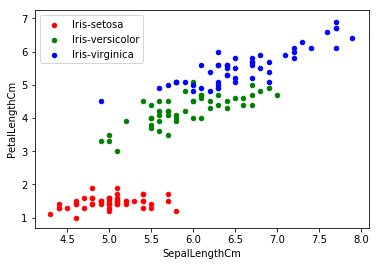

In [10]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue"]
for i, v in enumerate(df.Species.unique()): 
    df[df.Species == v].plot.scatter(features[0], features[1], color = colors[i], ax = ax, label = v)

accuracy: 0.9777777777777777 
precision: 0.9333333333333333 
recall: 1.0 
f1_score: 0.9655172413793104


Text(0,0.5,'PetalLengthCm')

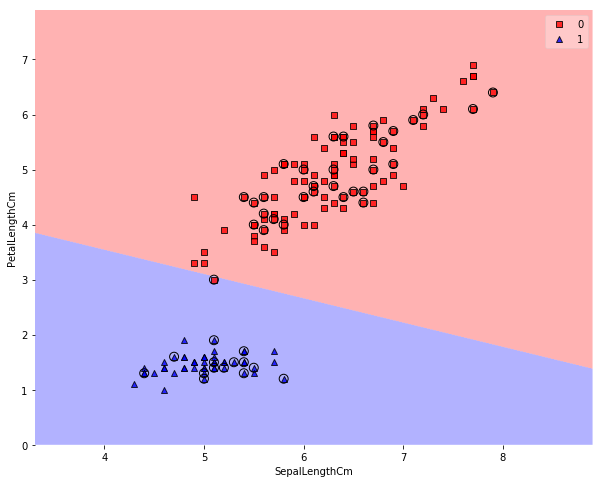

In [22]:
target = "Species"
X = df[features].values

y = np.where(df.Species == "Iris-setosa", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                            , y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

cf = metrics.confusion_matrix(y_test, y_test_pred)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])

accuracy: 0.9777777777777777 
precision: 0.9285714285714286 
recall: 1.0 
f1_score: 0.962962962962963


Text(0,0.5,'PetalLengthCm')

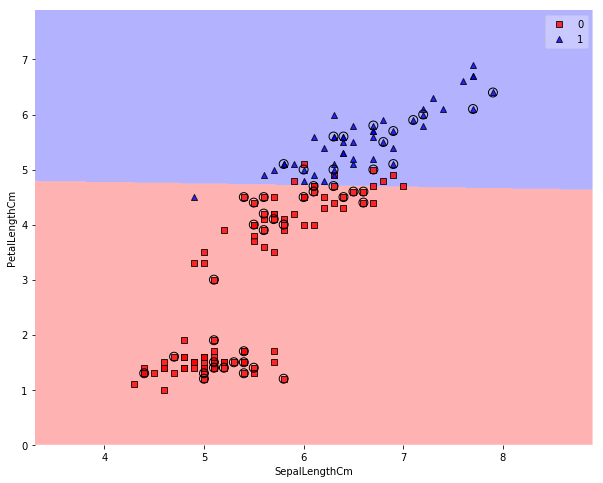

In [23]:
target = "Species"
X = df[features].values

y = np.where(df.Species == "Iris-virginica", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                            , y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

cf = metrics.confusion_matrix(y_test, y_test_pred)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [25]:
1 - 1/ len(y_test)

0.9777777777777777

accuracy: 0.6 
precision: 0.0 
recall: 0.0 
f1_score: 0.0


/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0,0.5,'PetalLengthCm')

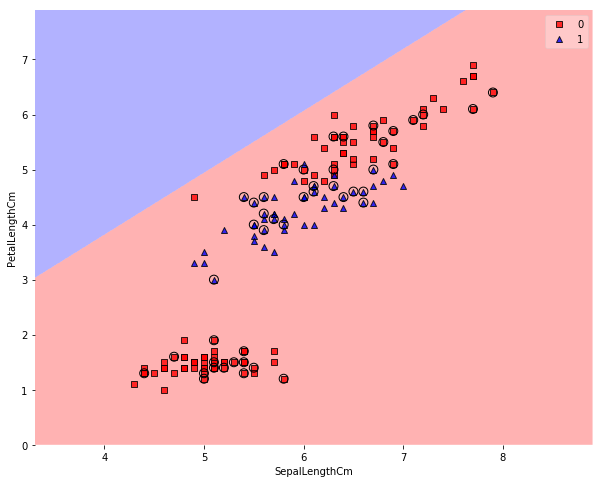

In [26]:
target = "Species"
X = df[features].values

y = np.where(df.Species == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                            , y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

cf = metrics.confusion_matrix(y_test, y_test_pred)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [27]:
pd.Series(y_test).value_counts()/len(y_test)

0    0.6
1    0.4
dtype: float64

accuracy: 0.9555555555555556 
precision: 0.9444444444444444 
recall: 0.9444444444444444 
f1_score: 0.9444444444444444


Text(0,0.5,'PetalLengthCm')

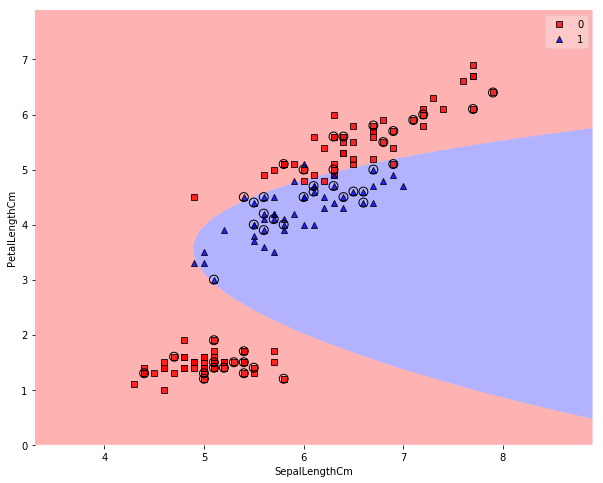

In [30]:
target = "Species"
X = df[features].values

y = np.where(df.Species == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                            , y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=4, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

cf = metrics.confusion_matrix(y_test, y_test_pred)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [32]:
a = np.array([
    [2, 3, 4],
    [-1, 0, 8],
    [9, 10, 2],
    [0, 2, -1]
])
a

array([[ 2,  3,  4],
       [-1,  0,  8],
       [ 9, 10,  2],
       [ 0,  2, -1]])

In [40]:
a = np.random.ranf((1000, 100))
a.shape

(1000, 100)

In [41]:
preprocessing.PolynomialFeatures(degree=3, include_bias=False).fit_transform(a).shape

(1000, 176850)

accuracy: 0.9777777777777777 
precision: 1.0 
recall: 0.9444444444444444 
f1_score: 0.9714285714285714


Text(0,0.5,'PetalLengthCm')

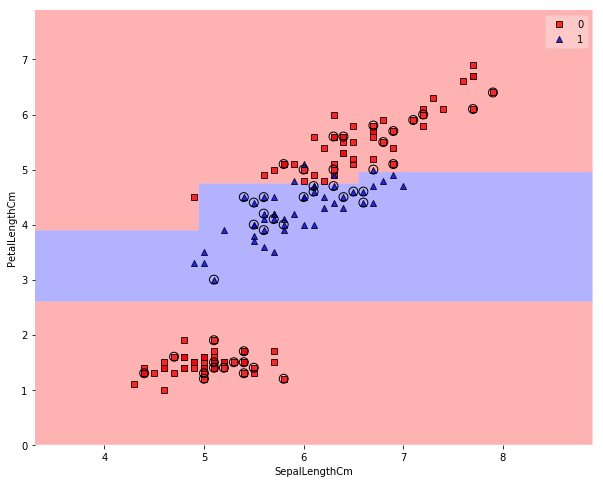

In [43]:
target = "Species"
X = df[features].values

y = np.where(df.Species == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                            , y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=4))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

cf = metrics.confusion_matrix(y_test, y_test_pred)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])

accuracy: 0.9777777777777777 
precision: 0.9473684210526315 
recall: 1.0 
f1_score: 0.972972972972973


Text(0,0.5,'PetalLengthCm')

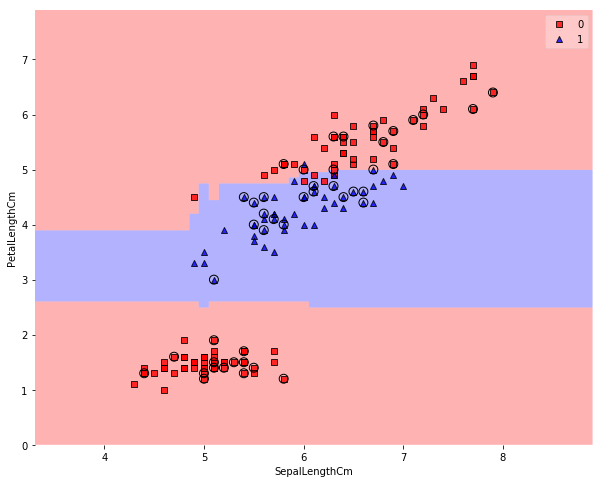

In [44]:
target = "Species"
X = df[features].values

y = np.where(df.Species == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                            , y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(max_depth=4))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

cf = metrics.confusion_matrix(y_test, y_test_pred)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])

accuracy: 0.9555555555555556 
precision: 0.9444444444444444 
recall: 0.9444444444444444 
f1_score: 0.9444444444444444


Text(0,0.5,'PetalLengthCm')

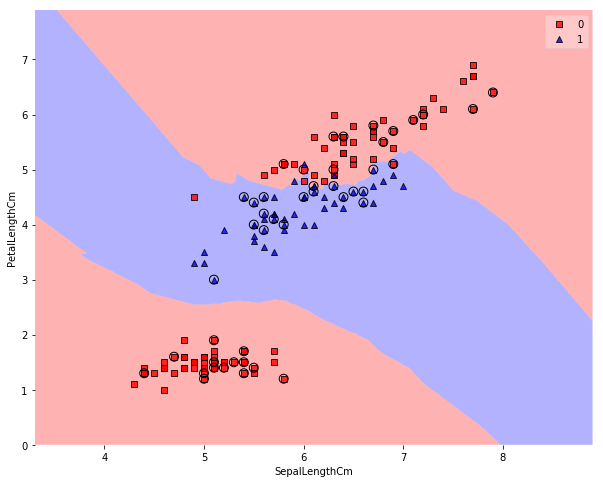

In [45]:
target = "Species"
X = df[features].values

y = np.where(df.Species == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                            , y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", neighbors.KNeighborsClassifier())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

cf = metrics.confusion_matrix(y_test, y_test_pred)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])

accuracy: 0.9777777777777777 
precision: 1.0 
recall: 0.9444444444444444 
f1_score: 0.9714285714285714


Text(0,0.5,'PetalLengthCm')

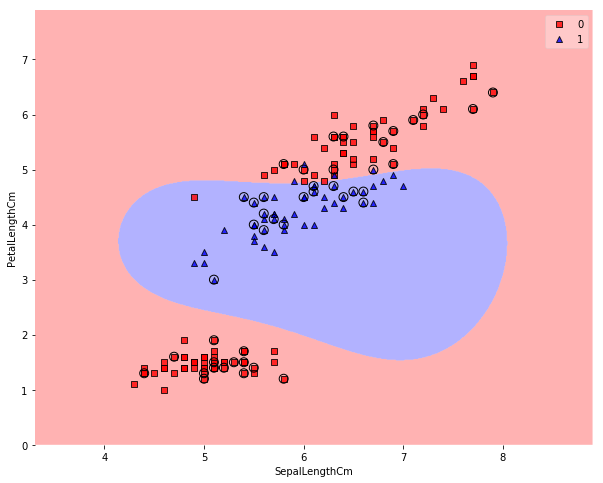

In [46]:
target = "Species"
X = df[features].values

y = np.where(df.Species == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X
                            , y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", svm.SVC())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

cf = metrics.confusion_matrix(y_test, y_test_pred)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])